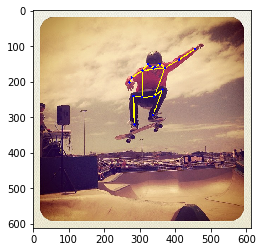

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from config import cfg
import sys
import cv2
import os.path as osp
sys.path.insert(0, osp.join(cfg.root_dir, 'lib'))
from utils.visualize import visualize
import json


def read_img(img_root_path,img_id):
    img_path = img_root_path + str(img_id).zfill(12) + '.jpg'
    img = cv2.imread(img_path)
    return img
    
def get_keypoints(predict_path):
    file=open(predict_path)
    predic_list=json.load(file)
    dic0=predic_list[0]
    return dic0["keypoints"]

def reverse_ch(img_bgr):
    img_rgb = np.zeros(img_bgr.shape, img_bgr.dtype)
    img_rgb[:,:,0] = img_bgr[:,:,2]
    img_rgb[:,:,1] = img_bgr[:,:,1]
    img_rgb[:,:,2] = img_bgr[:,:,0]
    return img_rgb

if __name__ == '__main__':
    predict_path="../../logs/default.COCO.res50.384x288.CPN/results.json"
    img_root_path="/home/data/COCO/MSCOCO/val2017/"
    img_id=581357
    
    tmpimg=read_img(img_root_path,img_id)
    keypoints=get_keypoints(predict_path)

    res_img=visualize(tmpimg, det_boxes=None, gt_boxes=None, keypoints=keypoints, is_show_label=True, 
              show_cls_label = True, show_skeleton_labels=False, classes=None, thresh=0.5, name='detection',
              return_img=True)
    
    cv2.imwrite('vis.jpg', res_img)
    
    plt.imshow(reverse_ch(res_img))
    plt.show()
#     cv2.imshow('detection',res_img)